In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Google Drive 마운트

In [ ]:
from google.colab import drive   

drive.mount('/content/gdrive/')  

Mounted at /content/gdrive/


In [ ]:
# 파일 다운로드

import shutil

shutil.copy('/content/gdrive/My Drive/Colab Notebooks/dataset/dog_image.zip', '/content/')

'/content/dog_image.zip'

# root dir 설정 (Colab 이외의 환경에서는 root dir 을 변경해주면 된다)

In [ ]:
root_dir = '/content'

In [ ]:
import os
import shutil

if os.path.exists( os.path.join(root_dir, 'dog_image') ):
    shutil.rmtree( os.path.join(root_dir, 'dog_image') )

In [ ]:
import zipfile

with zipfile.ZipFile(os.path.join(root_dir, 'dog_image.zip'), 'r') as target_file:

    target_file.extractall(os.path.join(root_dir, 'dog_image')) 

In [ ]:
import os
import shutil

if not os.path.exists(os.path.join(root_dir, 'dog_image/test')):    
    os.mkdir(os.path.join(root_dir, 'dog_image/test'))

if not os.path.exists(os.path.join(root_dir, 'dog_image/test_image_files')):    
    os.mkdir(os.path.join(root_dir, 'dog_image/test_image_files'))

In [ ]:
# 데이터 전체 개수 확인

import os
import glob

label_name_list = os.listdir(os.path.join(root_dir, 'dog_image/train/'))

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  4
['shepherd', 'jindo_dog', 'chihuahua', 'yorkshire_terrier']


먼저 train -> test 디렉토리로 ratio 만큼 move

In [ ]:
import os
import glob
import shutil

ratio = 0.1    # train : test = 90 : 10

src_root_dir = os.path.join(root_dir,'dog_image/train/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')

label_name_list = os.listdir(src_root_dir) 

for label_name in label_name_list:   # test 디렉토리에 label 디렉토리 생성
    dst_label_name_dir = dst_root_dir + label_name

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)

for label_name in label_name_list:    # 파일 move src dir => dst dir
    train_image_file_list = glob.glob(src_root_dir+label_name+'/*')
    split_num = int(ratio*len(train_image_file_list))
    test_image_file_list = train_image_file_list[0:split_num]

    for image_file in test_image_file_list:
        shutil.move(image_file, dst_root_dir+label_name)    # move 

In [ ]:
# train : test 데이터 비율 확인

src_root_dir = os.path.join(root_dir,'dog_image/train/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test/')

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(src_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(src_root_dir+label_name))
    test_data_nums = len(os.listdir(dst_root_dir+label_name))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

4 4
train =>  chihuahua 329  , test =>  chihuahua 36
train =>  jindo_dog 324  , test =>  jindo_dog 36
train =>  shepherd 339  , test =>  shepherd 37
train =>  yorkshire_terrier 342  , test =>  yorkshire_terrier 37


test -> test_image_files 디렉토리로 copy

In [ ]:
import os
import glob
import shutil

src_root_dir = os.path.join(root_dir, 'dog_image/test/')
dst_root_dir = os.path.join(root_dir, 'dog_image/test_image_files/')

label_name_list = os.listdir(src_root_dir)

for label_name in label_name_list:  # 파일 copy src dir => dst dir
    image_file_list = glob.glob(src_root_dir+label_name+'/*')
    print('total [%s] image file nums => [%s]' % (label_name ,len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:
        shutil.copy(image_file, dst_root_dir)    # copy 
        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)

total [shepherd] image file nums => [37]
total copy nums =>  37
total [jindo_dog] image file nums => [36]
total copy nums =>  36
total [chihuahua] image file nums => [36]
total copy nums =>  36
total [yorkshire_terrier] image file nums => [37]
total copy nums =>  37


# ImageDataGenerator 설정

In [ ]:
IMG_WIDTH = 224  
IMG_HEIGHT = 224  

train_dir = os.path.join(root_dir, 'dog_image/train/')
validation_dir = os.path.join(root_dir, 'dog_image/train/')
test_dir = os.path.join(root_dir, 'dog_image/test/')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, 
                                    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                    validation_split=0.15)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, color_mode='rgb', 
                                                class_mode='sparse', subset = 'training',
                                                target_size=(IMG_WIDTH,IMG_HEIGHT))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=16, color_mode='rgb', 
                                                          class_mode='sparse', subset = 'validation',
                                                          target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 1136 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)

{'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}


# Transfer Learning base 모델 구축

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))                  
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 32)                1605664   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,834,660
Trainable params: 4,812,772
Non-trainable params: 21,888
_________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)                     

hist = model.fit(train_generator, validation_data=validation_generator,
                 epochs=50, callbacks=[earlystopping])

Epoch 1/50
71/71 [==============================] - 29s 231ms/step - loss: 1.5834 - accuracy: 0.4173 - val_loss: 0.8169 - val_accuracy: 0.7172
Epoch 2/50
71/71 [==============================] - 16s 224ms/step - loss: 0.8837 - accuracy: 0.6241 - val_loss: 0.4921 - val_accuracy: 0.7980
Epoch 3/50
71/71 [==============================] - 16s 223ms/step - loss: 0.6690 - accuracy: 0.7174 - val_loss: 0.3213 - val_accuracy: 0.8939
Epoch 4/50
71/71 [==============================] - 16s 222ms/step - loss: 0.5160 - accuracy: 0.8090 - val_loss: 0.2669 - val_accuracy: 0.8990
Epoch 5/50
71/71 [==============================] - 16s 223ms/step - loss: 0.4645 - accuracy: 0.8248 - val_loss: 0.2062 - val_accuracy: 0.9141
Epoch 6/50
71/71 [==============================] - 16s 225ms/step - loss: 0.4051 - accuracy: 0.8504 - val_loss: 0.1875 - val_accuracy: 0.9141
Epoch 7/50
71/71 [==============================] - 16s 224ms/step - loss: 0.3498 - accuracy: 0.8785 - val_loss: 0.1803 - val_accuracy: 0.9394

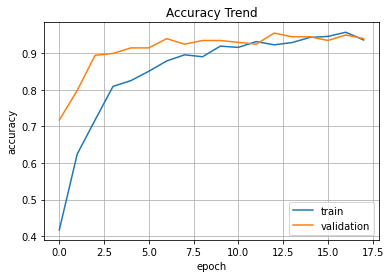

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

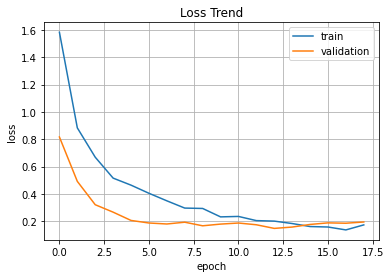

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=32, color_mode='rgb',
                                              class_mode='sparse', target_size=(IMG_WIDTH,IMG_HEIGHT))

Found 146 images belonging to 4 classes.


In [ ]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 122ms/step - loss: 0.1143 - accuracy: 0.9521


[0.11433375626802444, 0.9520547986030579]

In [ ]:
import random
import os
import numpy as np
import cv2
import glob

label_dict = {'chihuahua': 0, 'jindo_dog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}

test_image_files_list = glob.glob(root_dir+ '/dog_image/test_image_files/*.jpg')

random.shuffle(test_image_files_list)

test_num = 16
test_image_files = test_image_files_list[:test_num]  # 태스트 파일이름은 정답.숫자.jpg 

label_list = []

for i in range(len(test_image_files)):
    label = test_image_files[i].split('/')[-1].split('.')[0].strip()
    label_list.append(label_dict[label])

src_img_list = []

for i in range(len(test_image_files)):
    src_img = cv2.imread(test_image_files[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    src_img_list.append(src_img)

# 4차원 텐서  변환
src_img_array = np.array(src_img_list)
label_array = np.array(label_list)

print(src_img_array.shape, label_array.shape)
print(label_array)

(16, 224, 224, 3) (16,)
[1 1 2 2 3 1 1 3 2 2 0 1 3 0 1 3]


In [ ]:
pred = model.predict(src_img_array)
print(pred.shape)

(16, 4)


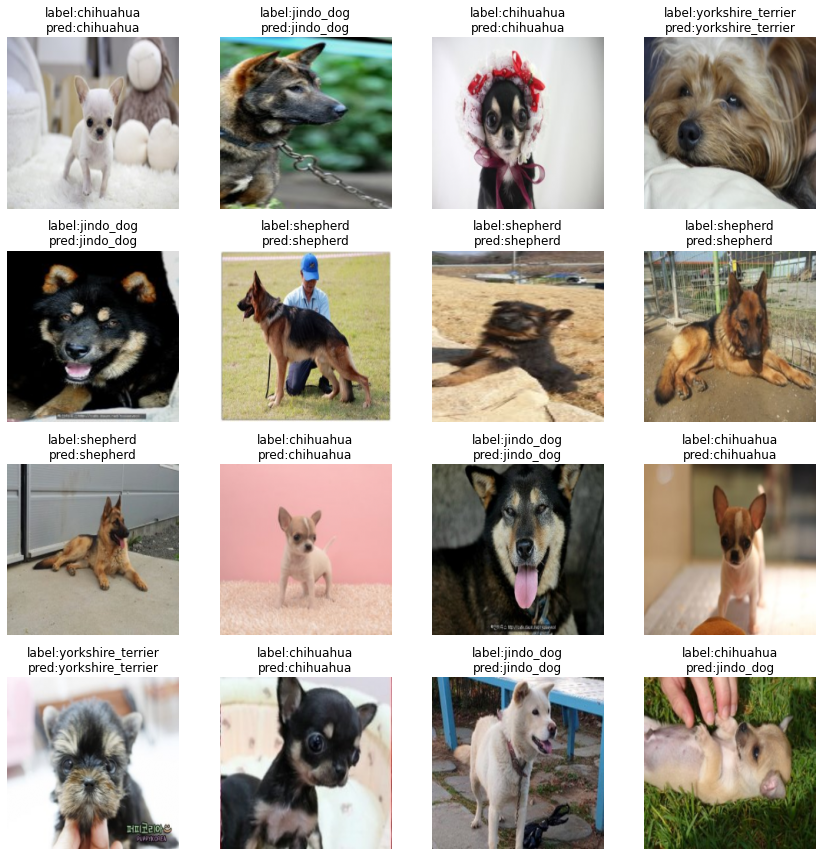

In [ ]:
import matplotlib.pyplot as plt

class_names = ['chihuahua', 'jindo_dog', 'shepherd', 'yorkshire_terrier']

plt.figure(figsize=(12,12))

for pos in range(len(pred)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')

    label_str = class_names[label_array[pos]]
    pred_str = class_names[np.argmax(pred[pos])]

    plt.title('label:' + label_str + '\npred:' + pred_str)

    plt.imshow(src_img_array[pos])

plt.tight_layout()
plt.show()